In [1]:
from utils import *

# Linear Regression

In [10]:
df, train, test, val = get_data(normalize=True, binary_label=False)

In [ ]:
from sklearn.linear_model import SGDRegressor

### Analytical Linear Regression From Scratch

In [15]:
class ScratchLinearRegressionAnalytical:
    def __init__(self):
        self.weights = None

    def fit(self, X, y):
        X_b = np.c_[np.ones((len(X), 1)), X]
        self.weights = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

    def predict(self, X):
        X_b = np.c_[np.ones((len(X), 1)), X]
        return X_b.dot(self.weights)


test_model(ScratchLinearRegressionAnalytical(), train, test, classification=False)
# works really poorly with not normalized data
# Why worse than sklearn?

Time taken to train the model:  0.023252487182617188
Root Mean Squared Error: 8310.886013705811


8310.886013705811

### Scratch

In [17]:
def _sigmoid(x):
    return 1 / (1 + np.exp(-x))


class ScratchLinearRegression:

    def __init__(self, lr=0.01, n_iters=1000, regularization=None, alpha=0.1, l1_ratio=0.5, logistic=False,
                 classification=False):
        self.lr = lr
        self.n_iters = n_iters
        self.weights = None
        self.bias = None
        self.regularization = regularization
        self.regularization_param = alpha
        self.l1_ratio = l1_ratio
        self.classification = classification
        self.model = 'logistic' if logistic else 'perceptron'  #todo check

    def fit(self, X, y):
        n_samples, n_features = X.shape

        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.n_iters):
            y_pred = np.dot(X, self.weights) + self.bias

            if self.classification:
                if self.model == 'logistic':
                    y_pred = _sigmoid(y_pred)
                else:
                    y_pred = np.where(y_pred>=0, 1, 0)

            if self.regularization == 'l1':
                dw = (1 / n_samples) * np.dot(X.T, (y_pred - y)) + np.sign(self.weights) * self.regularization_param
                db = (1 / n_samples) * np.sum(y_pred - y) + np.sign(self.bias) * self.regularization_param
            elif self.regularization == 'l2':
                dw = (1 / n_samples) * np.dot(X.T, (y_pred - y)) + 2 * self.weights * self.regularization_param
                db = (1 / n_samples) * np.sum(y_pred - y) + 2 * self.bias * self.regularization_param
            elif self.regularization == 'elasticnet':
                dw = ((1 / n_samples) * np.dot(X.T, (y_pred - y))
                      + 2 * self.weights * (1 - self.regularization_param)
                      + np.sign(self.weights) * self.regularization_param)
                db = ((1 / n_samples) * np.sum(y_pred - y)
                      + 2 * self.bias * (1 - self.regularization_param)
                      + np.sign(self.bias) * self.regularization_param)
            elif self.regularization == 'elasticnetV2':
                dw = (
                        (1 / n_samples) * np.dot(X.T, (y_pred - y))
                        + self.regularization_param *
                        (
                                2 * self.weights * (1 - self.l1_ratio)
                                + np.sign(self.weights) * self.l1_ratio
                        )
                )
                db = (
                        (1 / n_samples) * np.sum(y_pred - y)
                        + self.regularization_param *
                        (
                                2 * self.bias * (1 - self.l1_ratio)
                                + np.sign(self.bias) * self.l1_ratio
                        )
                )
            elif self.regularization is None or self.regularization == '':
                dw = (1 / n_samples) * np.dot(X.T, (y_pred - y))
                db = (1 / n_samples) * np.sum(y_pred - y)
            else:
                raise ValueError('Invalid regularization parameter')

            self.weights -= self.lr * dw
            self.bias -= self.lr * db

    def predict(self, X):
        y_pred = np.dot(X, self.weights) + self.bias

        if self.classification:
            if self.model == 'logistic':
                y_pred = _sigmoid(y_pred)
                y_pred = [1 if i >= 0.5 else 0 for i in y_pred]
            else:
                y_pred = [1 if i >= 0 else 0 for i in y_pred]
        return y_pred

## No regularization

### Sklearn

In [18]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression() # works also with not normalized data
test_model(regressor, train, test, classification=False)

Time taken to train the model:  0.04581499099731445
Root Mean Squared Error: 8273.862920013378


8273.862920013378

In [23]:
regressor = SGDRegressor(max_iter=1000, penalty=None, learning_rate='constant', shuffle=False, eta0=0.00001,
                         early_stopping=False)
rmse_LR_NR_sk = test_model(regressor, train, test, classification=False)

Time taken to train the model:  3.019599199295044
Root Mean Squared Error: 8275.739371762584


/home/vmcvastry/.local/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1548: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


In [36]:
#No regularization
regressor = ScratchLinearRegression(regularization='', n_iters=1000,lr=0.2)
rmse_LR_NR_my = test_model(regressor, train, test, classification=False)

Time taken to train the model:  1.3438680171966553
Root Mean Squared Error: 8275.80546379286


Trying hyperparameters: 0.001
Time taken to train the model:  1.3562700748443604
Root Mean Squared Error: 7546.217657591242
Value: 7546.217657591242
Trying hyperparameters: 0.002
Time taken to train the model:  0.9650344848632812
Root Mean Squared Error: 7485.639353084593
Value: 7485.639353084593
Trying hyperparameters: 0.004
Time taken to train the model:  0.9170608520507812
Root Mean Squared Error: 7487.756139280329
Value: 7487.756139280329
Trying hyperparameters: 0.008
Time taken to train the model:  0.9341013431549072
Root Mean Squared Error: 7486.791903303474
Value: 7486.791903303474
Trying hyperparameters: 0.016
Time taken to train the model:  0.8498692512512207
Root Mean Squared Error: 7482.292673519695
Value: 7482.292673519695
Trying hyperparameters: 0.032
Time taken to train the model:  0.8841171264648438
Root Mean Squared Error: 7481.992739704844
Value: 7481.992739704844
Trying hyperparameters: 0.064
Time taken to train the model:  0.865546464920044
Root Mean Squared Error: 7

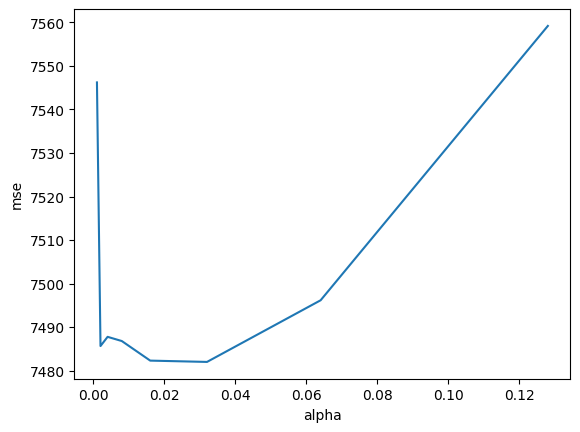

Time taken to train the model:  0.8053073883056641
Root Mean Squared Error: 8276.733410799
Best rmse for Linear Regression (scratch): 8276.733410799 with lr=0.032


In [52]:
 #TO DEL
def get_model(param):
    return  ScratchLinearRegression(regularization='', n_iters=1000,lr=param)


def iterate_hyperparameters():
    alpha = 0.001
    while alpha < 0.2:
        yield alpha
        alpha *= 2


best_param, params, accuracies = optimize_hyperparameters(get_model, iterate_hyperparameters(), train, test, val,
                                                          classification=False)
plot_2d(params, accuracies, 'alpha', 'mse')
regressor = get_model(best_param)

rmse_LR_NR_my = test_model(regressor, train, test, classification=False)
print(f"Best rmse for Linear Regression (scratch): {rmse_LR_NR_my} with lr={best_param}")


## L1 regularization

### Sklearn

In [37]:
regressor = SGDRegressor(max_iter=1000, penalty='l1', learning_rate='constant', shuffle=False, eta0=0.00001, alpha=100)
rmse_LR_L1_sk = test_model(regressor, train, test, classification=False)

Time taken to train the model:  4.956868648529053
Root Mean Squared Error: 8251.875504985122


### Scratch

Trying hyperparameters: 0.1
Time taken to train the model:  2.140456199645996
Root Mean Squared Error: 7485.112666374343
Value: 7485.112666374343
Trying hyperparameters: 0.2
Time taken to train the model:  1.0882043838500977
Root Mean Squared Error: 7484.96648216334
Value: 7484.96648216334
Trying hyperparameters: 0.4
Time taken to train the model:  0.971642255783081
Root Mean Squared Error: 7484.705585117933
Value: 7484.705585117933
Trying hyperparameters: 0.8
Time taken to train the model:  0.9851326942443848
Root Mean Squared Error: 7484.280579452767
Value: 7484.280579452767
Trying hyperparameters: 1.6
Time taken to train the model:  0.9722976684570312
Root Mean Squared Error: 7483.790943200983
Value: 7483.790943200983
Trying hyperparameters: 3.2
Time taken to train the model:  0.9697942733764648
Root Mean Squared Error: 7483.222028489958
Value: 7483.222028489958
Trying hyperparameters: 6.4
Time taken to train the model:  1.206376552581787
Root Mean Squared Error: 7482.166399702954
V

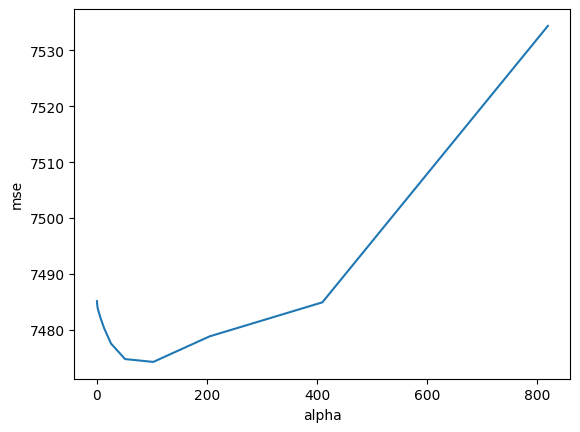

Time taken to train the model:  1.022836685180664
Root Mean Squared Error: 8251.90777476523
Best rmse for Linear Regression L1 (scratch): 8251.90777476523 with alpha=102.4


In [41]:
def get_model(param):
    return ScratchLinearRegression(regularization='l1', alpha=param,lr=0.01)


def iterate_hyperparameters():
    # for alpha in range(1,1000,100):
    #     yield alpha
    alpha = 0.1
    while alpha < 1000:
        yield alpha
        alpha *= 2


best_param, params, accuracies = optimize_hyperparameters(get_model, iterate_hyperparameters(), train, test, val,
                                                          classification=False)
plot_2d(params, accuracies, 'alpha', 'mse')
regressor = ScratchLinearRegression(regularization='l1', alpha=best_param)

rmse_LR_L1_my = test_model(regressor, train, test, classification=False)
print(f"Best rmse for Linear Regression L1 (scratch): {rmse_LR_L1_my} with alpha={best_param}")

##  L2 regularization

### Sklearn

In [47]:
regressor = SGDRegressor(max_iter=1000, penalty='l2', learning_rate='constant', shuffle=False, eta0=0.00001, alpha=0.5)
rmse_LR_L2_sk = test_model(regressor, train, test, classification=False)

Time taken to train the model:  0.32388901710510254
Root Mean Squared Error: 8266.18668587692


### Scratch

Trying hyperparameters: 0.001
Time taken to train the model:  2.188009262084961
Root Mean Squared Error: 7484.88229219937
Value: 7484.88229219937
Trying hyperparameters: 0.002
Time taken to train the model:  1.1739675998687744
Root Mean Squared Error: 7484.502882453825
Value: 7484.502882453825
Trying hyperparameters: 0.004
Time taken to train the model:  0.9353456497192383
Root Mean Squared Error: 7483.7728705543095
Value: 7483.7728705543095
Trying hyperparameters: 0.008
Time taken to train the model:  0.9559571743011475
Root Mean Squared Error: 7482.4243387325205
Value: 7482.4243387325205
Trying hyperparameters: 0.016
Time taken to train the model:  0.8981657028198242
Root Mean Squared Error: 7480.145248096583
Value: 7480.145248096583
Trying hyperparameters: 0.032
Time taken to train the model:  0.8814253807067871
Root Mean Squared Error: 7477.061750689474
Value: 7477.061750689474
Trying hyperparameters: 0.064
Time taken to train the model:  0.876652717590332
Root Mean Squared Error: 

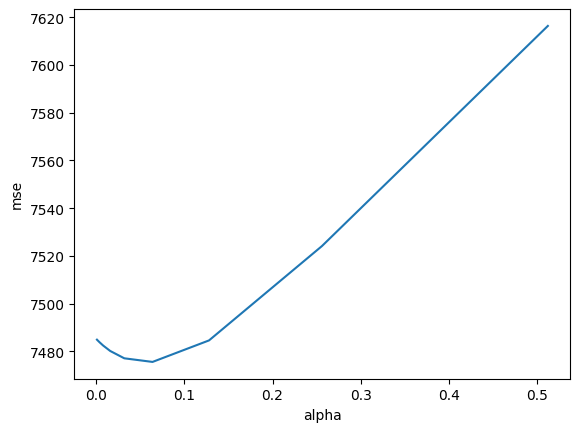

Time taken to train the model:  0.8603434562683105
Root Mean Squared Error: 8270.084734322667
Best rmse for Linear Regression L2 (scratch): 8251.90777476523 with alpha=0.064


In [48]:
#L2 regularization
def get_model(param):
    return ScratchLinearRegression(regularization='l2', alpha=param,lr=0.01)

def iterate_hyperparameters():
    alpha = 0.001
    while alpha < 1:
        yield alpha
        alpha *= 2


best_param, params, accuracies = optimize_hyperparameters(get_model, iterate_hyperparameters(), train, test, val,
                                                          classification=False)
plot_2d(params, accuracies, 'alpha', 'mse')
regressor = ScratchLinearRegression(regularization='l2', alpha=best_param)

rmse_LR_L2_my = test_model(regressor, train, test, classification=False)
print(f"Best rmse for Linear Regression L2 (scratch): {rmse_LR_L1_my} with alpha={best_param}")

## Elastic net regularization

### Sklearn

In [53]:
from sklearn.linear_model import ElasticNet

model = ElasticNet(alpha=0.01, l1_ratio=0.2)
rmse_LR_EL_sk = test_model(model, train, test, classification=False)

Time taken to train the model:  2.3339409828186035
Root Mean Squared Error: 8274.942072408272


In [54]:
model = SGDRegressor(max_iter=1000, penalty='elasticnet', learning_rate='constant', shuffle=False, eta0=0.00001,
                     early_stopping=False, alpha=0.5, l1_ratio=0.5)
rmse_LR_EL_sk = test_model(model, train, test, classification=False)

Time taken to train the model:  1.6507151126861572
Root Mean Squared Error: 8269.28193026024


### Scratch

Trying hyperparameters: 0.9990009990009991
Time taken to train the model:  2.0301804542541504
Mean Squared Error: 56006295.459590904
Root Mean Squared Error: 7483.735394813936
R-squared Score: 0.020662906978738738
Value: 56006295.459590904
Trying hyperparameters: 0.998003992015968
Time taken to train the model:  1.2977888584136963
Mean Squared Error: 56000627.83486049
Root Mean Squared Error: 7483.3567224114395
R-squared Score: 0.020762012179007194
Value: 56000627.83486049
Trying hyperparameters: 0.9960159362549801
Time taken to train the model:  1.377115249633789
Mean Squared Error: 55989746.36672418
Root Mean Squared Error: 7482.629642493619
R-squared Score: 0.02095228767009205
Value: 55989746.36672418
Trying hyperparameters: 0.9920634920634921
Time taken to train the model:  1.4177486896514893
Mean Squared Error: 55969809.10386689
Root Mean Squared Error: 7481.297287494121
R-squared Score: 0.021300914568001206
Value: 55969809.10386689
Trying hyperparameters: 0.984251968503937
Time t

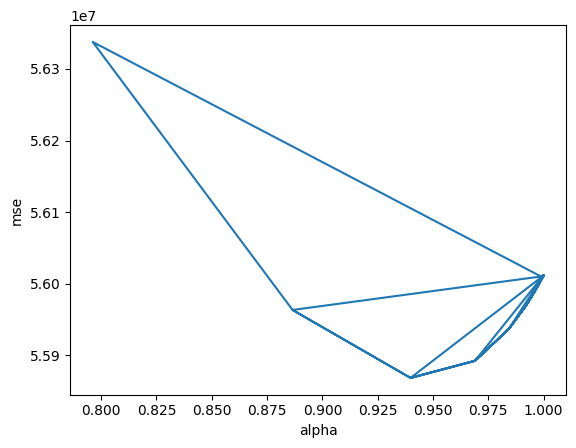

Time taken to train the model:  1.145259141921997
Mean Squared Error: 68387676.64274618
Root Mean Squared Error: 8269.684192443276
R-squared Score: 0.03134081491081331


68387676.64274618

In [13]:
def get_model(param):
    return ScratchLinearRegression(regularization='elasticnet', alpha=param)


def iterate_hyperparameters():
    l1 = 1
    while l1 < 200:
        l2 = 0.001
        while l2 < 0.5:
            yield l1 / (l1 + l2)
            l2 *= 2
        l1 *= 2


best_param, params, accuracies = optimize_hyperparameters(get_model, iterate_hyperparameters(), train, test, val,
                                                          classification=False)
plot_2d(params, accuracies, 'alpha', 'mse')
regressor = ScratchLinearRegression(regularization='elasticnet', alpha=best_param)

rmse_LR_EL_my = test_model(regressor, train, test, classification=False)

Trying hyperparameters: 0.91
Time taken to train the model:  1.3808584213256836
Mean Squared Error: 55904913.86416126
Root Mean Squared Error: 7476.958864682971
R-squared Score: 0.022435685487639745
Value: 55904913.86416126
Trying hyperparameters: 0.92
Time taken to train the model:  1.1047961711883545
Mean Squared Error: 55887276.51624723
Root Mean Squared Error: 7475.779325010018
R-squared Score: 0.022744095620697014
Value: 55887276.51624723
Trying hyperparameters: 0.93
Time taken to train the model:  1.0943922996520996
Mean Squared Error: 55875007.554799184
Root Mean Squared Error: 7474.958699203574
R-squared Score: 0.022958633092606373
Value: 55875007.554799184
Trying hyperparameters: 0.9400000000000001
Time taken to train the model:  1.1066339015960693
Mean Squared Error: 55868637.835250504
Root Mean Squared Error: 7474.5326165085735
R-squared Score: 0.023070015260896137
Value: 55868637.835250504
Trying hyperparameters: 0.9500000000000001
Time taken to train the model:  1.27178716

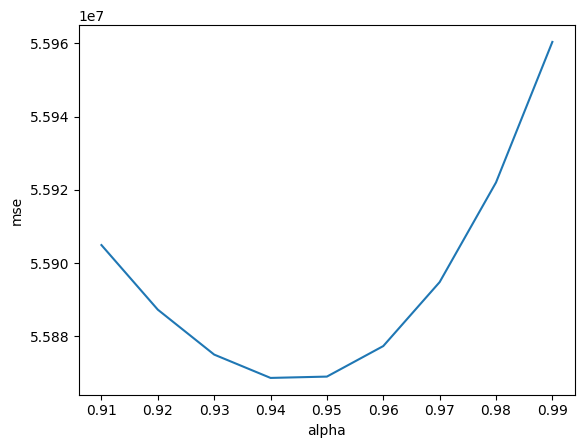

Time taken to train the model:  1.1934008598327637
Mean Squared Error: 68387703.38223955
Root Mean Squared Error: 8269.685809161045
R-squared Score: 0.031340436166321206


68387703.38223955

In [14]:
#Elastic net regularization

def get_model(param):
    return ScratchLinearRegression(regularization='elasticnet', alpha=param)


def iterate_hyperparameters():
    # for alpha in range(1,1000,100): #giuliu dice esponenziale tra 0 e 1
    #     yield alpha

    for a in range(1, 10):
        yield 0.9 + a / 100


best_param, params, accuracies = optimize_hyperparameters(get_model, iterate_hyperparameters(), train, test, val,
                                                          classification=False)
plot_2d(params, accuracies, 'alpha', 'mse')
regressor = ScratchLinearRegression(regularization='elasticnet', alpha=best_param)

rmse_LR_EL_my = test_model(regressor, train, test, classification=False)

Trying hyperparameters: (0.01, 0.5)
Time taken to train the model:  1.8538179397583008
Mean Squared Error: 56001486.63726316
Root Mean Squared Error: 7483.414103018966
R-squared Score: 0.020746994991357015
Value: 56001486.63726316
Trying hyperparameters: (0.01, 0.6)
Time taken to train the model:  1.1796128749847412
Mean Squared Error: 56006714.014235385
Root Mean Squared Error: 7483.763359048399
R-squared Score: 0.020655588049939166
Value: 56006714.014235385
Trying hyperparameters: (0.01, 0.7)
Time taken to train the model:  1.4242687225341797
Mean Squared Error: 56012081.66403663
Root Mean Squared Error: 7484.1219701469745
R-squared Score: 0.02056172827025593
Value: 56012081.66403663
Trying hyperparameters: (0.01, 0.8)
Time taken to train the model:  1.2425601482391357
Mean Squared Error: 56017591.62969057
Root Mean Squared Error: 7484.490071453804
R-squared Score: 0.020465379927593785
Value: 56017591.62969057
Trying hyperparameters: (0.01, 0.9)
Time taken to train the model:  1.1882

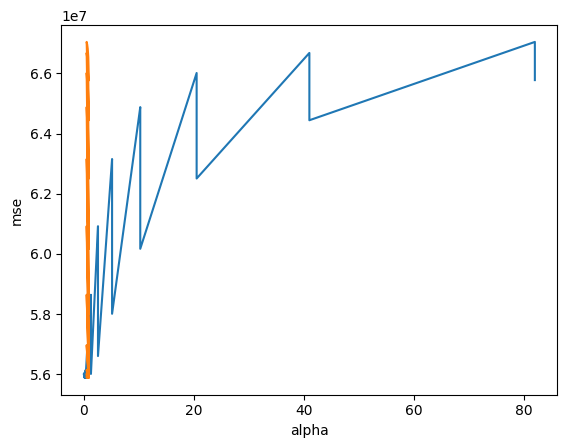

Time taken to train the model:  2.4938156604766846
Mean Squared Error: 68390149.31812192
Root Mean Squared Error: 8269.833693498433
R-squared Score: 0.031305791353470114


68390149.31812192

In [19]:
#Elastic net regularization

def get_model(param):
    a, b = param
    return ScratchLinearRegression(regularization='elasticnetV2', alpha=a, l1_ratio=b)


def iterate_hyperparameters():
    # for alpha in range(1,1000,100): #giuliu dice esponenziale tra 0 e 1
    #     yield alpha

    a = 0.01
    while a < 100:
        for b in range(5, 10):
            yield a, b / 10
        a *= 2


best_param, params, accuracies = optimize_hyperparameters(get_model, iterate_hyperparameters(), train, test, val,
                                                          classification=False)
plot_2d(params, accuracies, 'alpha', 'mse')
a, b = best_param
regressor = ScratchLinearRegression(regularization='elasticnetV2', alpha=a, l1_ratio=b)

rmse_LR_EL_my = test_model(regressor, train, test, classification=False)